In [1]:
#import findspark
#findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('stroke').getOrCreate()

In [2]:
df = spark.read.csv("./database/healthcare-dataset-stroke-data.csv",inferSchema=True,header=True)

In [3]:
df.show()

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
| 9046|  Male|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|51676|Female|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21| N/A|   never smoked|     1|
|31112|  Male|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
|60182|Female|49.0|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|     1|
| 1665|Female|79.0|           1|            0|         

In [4]:
df.count()

5110

In [5]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: string (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- stroke: integer (nullable = true)



In [6]:
df.select('age','gender','hypertension','heart_disease','ever_married','work_type').describe().show()

+-------+------------------+------+------------------+-------------------+------------+---------+
|summary|               age|gender|      hypertension|      heart_disease|ever_married|work_type|
+-------+------------------+------+------------------+-------------------+------------+---------+
|  count|              5110|  5110|              5110|               5110|        5110|     5110|
|   mean|43.226614481409015|  null|0.0974559686888454|0.05401174168297456|        null|     null|
| stddev| 22.61264672311348|  null| 0.296606674233791|0.22606298750336554|        null|     null|
|    min|              0.08|Female|                 0|                  0|          No| Govt_job|
|    max|              82.0| Other|                 1|                  1|         Yes| children|
+-------+------------------+------+------------------+-------------------+------------+---------+



In [7]:
df.select('Residence_type','avg_glucose_level','bmi','smoking_status','stroke').describe().show()

+-------+--------------+------------------+------------------+--------------+-------------------+
|summary|Residence_type| avg_glucose_level|               bmi|smoking_status|             stroke|
+-------+--------------+------------------+------------------+--------------+-------------------+
|  count|          5110|              5110|              5110|          5110|               5110|
|   mean|          null|106.14767710371804|28.893236911794673|          null| 0.0487279843444227|
| stddev|          null| 45.28356015058193|  7.85406672968016|          null|0.21531985698023753|
|    min|         Rural|             55.12|              10.3|       Unknown|                  0|
|    max|         Urban|            271.74|               N/A|        smokes|                  1|
+-------+--------------+------------------+------------------+--------------+-------------------+



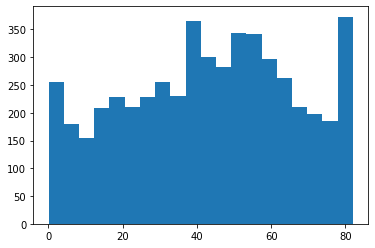

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
ageArr = np.array(df.select('age').collect())
plt.hist(ageArr,bins=20)
plt.show()

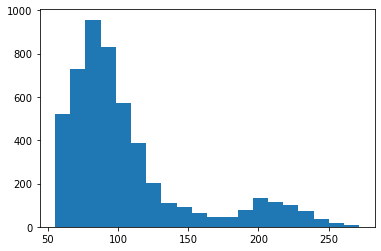

In [9]:
glucoseArr = np.array(df.select('avg_glucose_level').collect())
plt.hist(glucoseArr,bins=20)
plt.show()

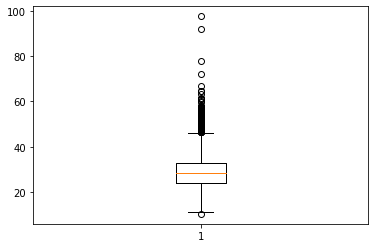

In [10]:
from pyspark.sql.functions import col
df1 = df.withColumn("bmi",df.bmi.cast('double')).fillna(28.8)
bmiArr = np.array(df1.select('bmi').collect())
#plt.hist(bmiArr,bins=50)
plt.boxplot(bmiArr)
plt.show()

In [11]:
df1.select('bmi').describe().show()

+-------+------------------+
|summary|               bmi|
+-------+------------------+
|  count|              5110|
|   mean|28.889569471624284|
| stddev| 7.698039167059631|
|    min|              10.3|
|    max|              97.6|
+-------+------------------+



In [12]:
df1.groupby('gender').count().show()
df1.groupby('hypertension').count().show()

+------+-----+
|gender|count|
+------+-----+
|Female| 2994|
| Other|    1|
|  Male| 2115|
+------+-----+

+------------+-----+
|hypertension|count|
+------------+-----+
|           1|  498|
|           0| 4612|
+------------+-----+



In [13]:
df1.groupby('heart_disease').count().show()
df1.groupby('ever_married').count().show()
df1.groupby('work_type').count().show()
df1.groupby('Residence_type').count().show()
df1.groupby('smoking_status').count().show()
df1.groupby('stroke').count().show()

+-------------+-----+
|heart_disease|count|
+-------------+-----+
|            1|  276|
|            0| 4834|
+-------------+-----+

+------------+-----+
|ever_married|count|
+------------+-----+
|          No| 1757|
|         Yes| 3353|
+------------+-----+

+-------------+-----+
|    work_type|count|
+-------------+-----+
| Never_worked|   22|
|Self-employed|  819|
|      Private| 2925|
|     children|  687|
|     Govt_job|  657|
+-------------+-----+

+--------------+-----+
|Residence_type|count|
+--------------+-----+
|         Urban| 2596|
|         Rural| 2514|
+--------------+-----+

+---------------+-----+
| smoking_status|count|
+---------------+-----+
|         smokes|  789|
|        Unknown| 1544|
|   never smoked| 1892|
|formerly smoked|  885|
+---------------+-----+

+------+-----+
|stroke|count|
+------+-----+
|     1|  249|
|     0| 4861|
+------+-----+



In [14]:
from pyspark.sql.functions import isnull 
df_t = df.filter(isnull("gender"))
df_t.count()

0

In [15]:
df.filter(df['stroke']== 1).count() #Filter data with stroke value of 1 

249

In [16]:
df.filter(df['bmi']=='N/A').filter(df['stroke']== 1).count() #Filter data with stroke value of 1 and bmi value of

40

In [17]:
df2 = df1.filter(df1['bmi'] < 49.4)
df2.count()
df2.select('bmi').describe().show()

+-------+------------------+
|summary|               bmi|
+-------+------------------+
|  count|              5024|
|   mean|28.429219745222994|
| stddev| 6.829375112841112|
|    min|              10.3|
|    max|              49.3|
+-------+------------------+



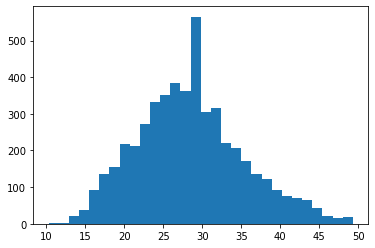

In [18]:
bmiArr2 = np.array(df2.select('bmi').collect())
plt.hist(bmiArr2,bins=30)
plt.show()

In [19]:
df3 = df2.filter(df1['gender'] != 'Other')
df3.count()

5023

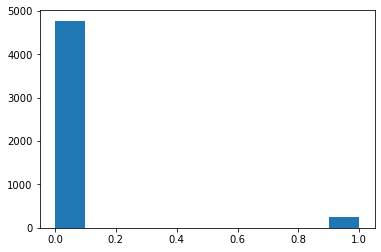

In [20]:
plt.hist(np.array(df3.select('stroke').collect()))
plt.show()

In [21]:
df_s = spark.read.csv("./database/dataset-stroke-2w.csv",inferSchema=True,header=True)

In [22]:
df_s.count()

43400

In [23]:
df_s.show()

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|30669|  Male| 3.0|           0|            0|          No|     children|         Rural|            95.12|18.0|           null|     0|
|30468|  Male|58.0|           1|            0|         Yes|      Private|         Urban|            87.96|39.2|   never smoked|     0|
|16523|Female| 8.0|           0|            0|          No|      Private|         Urban|           110.89|17.6|           null|     0|
|56543|Female|70.0|           0|            0|         Yes|      Private|         Rural|            69.04|35.9|formerly smoked|     0|
|46136|  Male|14.0|           0|            0|         

In [24]:
df_s1 = df_s.fillna('Unknown')
df_s1.show()

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|30669|  Male| 3.0|           0|            0|          No|     children|         Rural|            95.12|18.0|        Unknown|     0|
|30468|  Male|58.0|           1|            0|         Yes|      Private|         Urban|            87.96|39.2|   never smoked|     0|
|16523|Female| 8.0|           0|            0|          No|      Private|         Urban|           110.89|17.6|        Unknown|     0|
|56543|Female|70.0|           0|            0|         Yes|      Private|         Rural|            69.04|35.9|formerly smoked|     0|
|46136|  Male|14.0|           0|            0|         

In [25]:
df_s1.select('bmi').describe().show()

+-------+------------------+
|summary|               bmi|
+-------+------------------+
|  count|             41938|
|   mean|28.605038390004545|
| stddev| 7.770020497238766|
|    min|              10.1|
|    max|              97.6|
+-------+------------------+



In [26]:
df_s2 = df_s1.fillna(28.6)
df_s2.show()

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|30669|  Male| 3.0|           0|            0|          No|     children|         Rural|            95.12|18.0|        Unknown|     0|
|30468|  Male|58.0|           1|            0|         Yes|      Private|         Urban|            87.96|39.2|   never smoked|     0|
|16523|Female| 8.0|           0|            0|          No|      Private|         Urban|           110.89|17.6|        Unknown|     0|
|56543|Female|70.0|           0|            0|         Yes|      Private|         Rural|            69.04|35.9|formerly smoked|     0|
|46136|  Male|14.0|           0|            0|         

In [27]:
 df_s2.filter(isnull("bmi")).count()

0

In [28]:
df_s3 = df_s2.filter(df_s2['bmi']<49.1)
df_s3.count()

42715

In [29]:
df_s4 = df_s3.filter(df_s3['gender'] != 'Other')
df_s4.count()

42704

In [30]:
df_s4.select('age','gender','hypertension','heart_disease','ever_married','work_type').describe().show()

+-------+-----------------+------+------------------+-------------------+------------+---------+
|summary|              age|gender|      hypertension|      heart_disease|ever_married|work_type|
+-------+-----------------+------+------------------+-------------------+------------+---------+
|  count|            42704| 42704|             42704|              42704|       42704|    42704|
|   mean|42.17437710753077|  null|0.0920756837766954|0.04760678156612964|        null|     null|
| stddev|22.62783071047469|  null|0.2891361442106498|0.21293528987922475|        null|     null|
|    min|             0.08|Female|                 0|                  0|          No| Govt_job|
|    max|             82.0|  Male|                 1|                  1|         Yes| children|
+-------+-----------------+------+------------------+-------------------+------------+---------+



In [31]:
df_s4.select('Residence_type','avg_glucose_level','bmi','smoking_status','stroke').describe().show()

+-------+--------------+------------------+------------------+--------------+--------------------+
|summary|Residence_type| avg_glucose_level|               bmi|smoking_status|              stroke|
+-------+--------------+------------------+------------------+--------------+--------------------+
|  count|         42704|             42704|             42704|         42704|               42704|
|   mean|          null|104.14932114087571|28.186661671038053|          null|0.018241850880479582|
| stddev|          null| 42.73396878503974|6.8992121959745045|          null| 0.13382639927905507|
|    min|         Rural|              55.0|              10.1|       Unknown|                   0|
|    max|         Urban|            291.05|              49.0|        smokes|                   1|
+-------+--------------+------------------+------------------+--------------+--------------------+



In [32]:
df_all = df3.unionByName(df_s4)

df_all.count()

47727

In [33]:
df_all = df_all.dropDuplicates()
df_all.count()

42909

In [34]:
df_all.show()

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|71673|Female|79.0|           0|            0|         Yes|      Private|         Urban|           110.85|24.1|formerly smoked|     1|
|63606|  Male|29.0|           0|            0|         Yes|     Govt_job|         Urban|            60.34|29.6|formerly smoked|     0|
|54866|Female| 9.0|           0|            0|          No|     children|         Rural|            57.27|28.0|        Unknown|     0|
|25315|  Male|31.0|           0|            0|         Yes|      Private|         Urban|           222.21|41.1|         smokes|     0|
|13948|Female|19.0|           0|            0|         

In [35]:
df_all.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = false)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = false)
 |-- bmi: double (nullable = false)
 |-- smoking_status: string (nullable = true)
 |-- stroke: integer (nullable = true)



In [36]:
import pyspark.sql.functions as F
df_all_1 = df_all.withColumn('gender',F.when(df_all['gender'] == 'Male',0).otherwise(1))
df_all_1 = df_all_1.withColumn('ever_married',F.when(df_all['ever_married'] == 'Yes',0).otherwise(1))
df_all_1 = df_all_1.withColumn('work_type',F.when(df_all['work_type'] == 'Private',0)
                               .when(df_all['work_type'] == 'Self-employed',1)
                               .when(df_all['work_type'] == 'children',2)
                               .when(df_all['work_type'] == 'Govt_job',3)
                               .otherwise(4))
df_all_1 = df_all_1.withColumn('Residence_type',F.when(df_all['Residence_type'] == 'Urban',0).otherwise(1))
df_all_1 = df_all_1.withColumn('smoking_status',F.when(df_all['smoking_status'] == 'never smoked',0)
                               .when(df_all['smoking_status'] == 'Unknown',1)
                               .when(df_all['smoking_status'] == 'formerly smoked',2)
                               .otherwise(3))

In [37]:
df_all_1.show()

+-----+------+----+------------+-------------+------------+---------+--------------+-----------------+----+--------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|work_type|Residence_type|avg_glucose_level| bmi|smoking_status|stroke|
+-----+------+----+------------+-------------+------------+---------+--------------+-----------------+----+--------------+------+
|71673|     1|79.0|           0|            0|           0|        0|             0|           110.85|24.1|             2|     1|
|63606|     0|29.0|           0|            0|           0|        3|             0|            60.34|29.6|             2|     0|
|54866|     1| 9.0|           0|            0|           1|        2|             1|            57.27|28.0|             1|     0|
|25315|     0|31.0|           0|            0|           0|        0|             0|           222.21|41.1|             3|     0|
|13948|     1|19.0|           0|            0|           1|        4|             0|      

In [38]:
df_all_1.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: integer (nullable = false)
 |-- age: double (nullable = false)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: integer (nullable = false)
 |-- work_type: integer (nullable = false)
 |-- Residence_type: integer (nullable = false)
 |-- avg_glucose_level: double (nullable = false)
 |-- bmi: double (nullable = false)
 |-- smoking_status: integer (nullable = false)
 |-- stroke: integer (nullable = true)



In [39]:
df_all_2 = df_all_1.withColumn('bmi',F.when(F.col('bmi') >30 , 3).otherwise(F.col('bmi')))
df_all_2 = df_all_2.withColumn('bmi',F.when(F.col('bmi') >25 , 2).otherwise(F.col('bmi')))
df_all_2 = df_all_2.withColumn('bmi',F.when(F.col('bmi') >18.5 , 1).otherwise(F.col('bmi')))
df_all_2 = df_all_2.withColumn('bmi',F.when(F.col('bmi') >3 , 0).otherwise(F.col('bmi')))
df_all_2 = df_all_2.withColumn('bmi',df_all_2['bmi'].cast('integer'))
df_all_2.show()

+-----+------+----+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|work_type|Residence_type|avg_glucose_level|bmi|smoking_status|stroke|
+-----+------+----+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
|71673|     1|79.0|           0|            0|           0|        0|             0|           110.85|  1|             2|     1|
|63606|     0|29.0|           0|            0|           0|        3|             0|            60.34|  2|             2|     0|
|54866|     1| 9.0|           0|            0|           1|        2|             1|            57.27|  2|             1|     0|
|25315|     0|31.0|           0|            0|           0|        0|             0|           222.21|  3|             3|     0|
|13948|     1|19.0|           0|            0|           1|        4|             0|            8

In [40]:
df_all_2 = df_all_2.withColumn('avg_glucose_level',F.when(F.col('avg_glucose_level') <140 , 0).otherwise(1))
df_all_2 = df_all_2.withColumn('avg_glucose_level',df_all_2['avg_glucose_level'].cast('integer'))
df_all_2.show()

+-----+------+----+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|work_type|Residence_type|avg_glucose_level|bmi|smoking_status|stroke|
+-----+------+----+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
|71673|     1|79.0|           0|            0|           0|        0|             0|                0|  1|             2|     1|
|63606|     0|29.0|           0|            0|           0|        3|             0|                0|  2|             2|     0|
|54866|     1| 9.0|           0|            0|           1|        2|             1|                0|  2|             1|     0|
|25315|     0|31.0|           0|            0|           0|        0|             0|                1|  3|             3|     0|
|13948|     1|19.0|           0|            0|           1|        4|             0|             

In [41]:
#df_all_2.corr('gender','stroke')

In [42]:
#df_all_2.corr('age','stroke')

In [43]:
#df_all_2.corr('hypertension','stroke')

In [44]:
#df_all_2.corr('heart_disease','stroke')

In [45]:
#df_all_2.corr('ever_married','stroke')

In [46]:
#df_all_2.corr('work_type','stroke')

In [47]:
#df_all_2.corr('Residence_type','stroke')

In [48]:
#df_all_2.corr('avg_glucose_level','stroke')

In [49]:
#df_all_2.corr('bmi','stroke')

In [50]:
#df_all_2.corr('smoking_status','stroke')

In [51]:
df_all_r = df_all_2.select('id','age','hypertension','heart_disease','avg_glucose_level'
                           ,'bmi','smoking_status','stroke')
df_all_r.show()

+-----+----+------------+-------------+-----------------+---+--------------+------+
|   id| age|hypertension|heart_disease|avg_glucose_level|bmi|smoking_status|stroke|
+-----+----+------------+-------------+-----------------+---+--------------+------+
|71673|79.0|           0|            0|                0|  1|             2|     1|
|63606|29.0|           0|            0|                0|  2|             2|     0|
|54866| 9.0|           0|            0|                0|  2|             1|     0|
|25315|31.0|           0|            0|                1|  3|             3|     0|
|13948|19.0|           0|            0|                0|  2|             0|     0|
|44105|69.0|           1|            0|                0|  3|             1|     0|
|59894|58.0|           0|            0|                0|  1|             0|     0|
|20347|18.0|           0|            0|                0|  1|             0|     0|
|52306|57.0|           0|            0|                0|  2|             0|

In [52]:
strokeArr = np.array(df_all_r.select('stroke').collect())
ageArr = np.array(df_all_r.select('age').collect())
#plt.scatter(strokeArr,ageArr)
plt.show()

In [53]:
df_all_r.filter(df_all_r['stroke'] == 1).filter(df_all_r['age'] < 38).count()

15

In [54]:
df_all_r2 = df_all_r.filter(df_all_r['age'] >= 38)
df_all_r2.count()

25061

In [55]:
df_stroke = df_all_r2.filter(df_all_r['stroke'] == 1)
df_stroke_n = df_all_r2.filter(df_all_r['stroke'] == 0).sample(False,0.11,0)
df_stroke.count()

804

In [56]:
df_stroke_n.count()

2661

In [76]:
df_con = df_stroke.unionByName(df_stroke_n)

df_con.count()

3465

In [58]:
df_con.sort('id').show()

+---+----+------------+-------------+-----------------+---+--------------+------+
| id| age|hypertension|heart_disease|avg_glucose_level|bmi|smoking_status|stroke|
+---+----+------------+-------------+-----------------+---+--------------+------+
| 29|44.0|           1|            0|                0|  2|             0|     0|
| 56|48.0|           0|            0|                1|  3|             2|     0|
| 80|79.0|           0|            0|                0|  1|             2|     1|
| 84|55.0|           0|            0|                0|  3|             0|     0|
| 87|79.0|           0|            0|                0|  3|             2|     0|
| 93|53.0|           0|            0|                0|  3|             2|     0|
|105|81.0|           1|            0|                1|  2|             0|     0|
|210|81.0|           0|            0|                0|  3|             0|     1|
|239|59.0|           1|            1|                1|  2|             2|     0|
|256|62.0|      

In [77]:
df_temp = df_con.select('id','age')
df_temp = df_temp.withColumn('age',F.when(F.col('age') >77 , 8).otherwise(F.col('age')))
df_temp = df_temp.withColumn('age',F.when(F.col('age') >72 , 7).otherwise(F.col('age')))
df_temp = df_temp.withColumn('age',F.when(F.col('age') >67 , 6).otherwise(F.col('age')))
df_temp = df_temp.withColumn('age',F.when(F.col('age') >62 , 5).otherwise(F.col('age')))
df_temp = df_temp.withColumn('age',F.when(F.col('age') >57 , 4).otherwise(F.col('age')))
df_temp = df_temp.withColumn('age',F.when(F.col('age') >52 , 3).otherwise(F.col('age')))
df_temp = df_temp.withColumn('age',F.when(F.col('age') >47 , 2).otherwise(F.col('age')))
df_temp = df_temp.withColumn('age',F.when(F.col('age') >42 , 1).otherwise(F.col('age')))
df_temp = df_temp.withColumn('age',F.when(F.col('age') >37 , 0).otherwise(F.col('age')))
df_temp = df_temp.withColumn("age",df_temp.age.cast('integer'))
df_temp = df_temp.withColumnRenamed( "age" , "age_grade" )
df_temp.show()

+-----+---------+
|   id|age_grade|
+-----+---------+
|71673|        8|
|62439|        2|
| 5563|        7|
|40899|        8|
|62466|        8|
|70822|        8|
|58202|        2|
| 3352|        8|
|60739|        8|
| 2390|        8|
|60491|        8|
|29281|        7|
|52282|        3|
|16817|        8|
|32503|        8|
|37132|        8|
|23368|        7|
|18587|        7|
|30184|        8|
| 8752|        5|
+-----+---------+
only showing top 20 rows



In [84]:
df_con_d = df_con.join(df_temp,on=(df_temp.id == df_con.id),how = 'inner')
df_con_d.show()

+-----+----+------------+-------------+-----------------+---+--------------+------+-----+---------+
|   id| age|hypertension|heart_disease|avg_glucose_level|bmi|smoking_status|stroke|   id|age_grade|
+-----+----+------------+-------------+-----------------+---+--------------+------+-----+---------+
|71673|79.0|           0|            0|                0|  1|             2|     1|71673|        8|
|62439|51.0|           0|            0|                0|  2|             2|     1|62439|        2|
| 5563|77.0|           0|            0|                0|  3|             0|     1| 5563|        7|
|40899|78.0|           0|            0|                0|  2|             2|     1|40899|        8|
|40899|78.0|           0|            0|                0|  2|             2|     1|40899|        8|
|62466|80.0|           0|            0|                0|  3|             0|     1|62466|        8|
|70822|80.0|           0|            0|                0|  1|             0|     1|70822|        8|


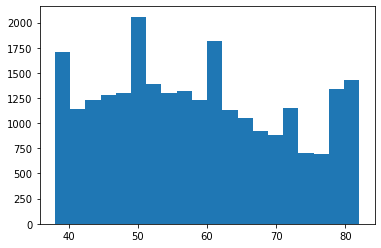

In [61]:
ageArr1 = np.array(df_all_r2.select('age').collect())
plt.hist(ageArr1,bins = 20)
plt.show()

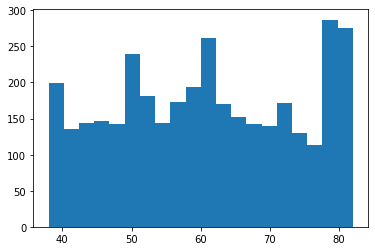

In [86]:
ageArr2 = np.array(df_con_d.select('age').collect())
plt.hist(ageArr2,bins = 20)
plt.show()

In [88]:
df_con_d.toPandas().to_csv('df_con.csv')